In [17]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_validate

In [40]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, log_loss, f1_score, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras import optimizers, callbacks 


from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization,Add,Dropout
from keras.models import Model, load_model

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils, plot_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
import collections

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

In [19]:
train = pd.read_csv('stats/train_final.csv')
test = pd.read_csv('stats/test_final.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')
print('train shape {}'.format(train.shape))
print('test shape {}'.format(test.shape))

train shape (2494, 6094)
test shape (1074, 6093)


In [20]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train['Crop_Id_Ne']),
                                                 train['Crop_Id_Ne'])
class_weights = list(class_weights)

In [31]:
# y_train= pd.get_dummies(train['Crop_Id_Ne'])
y_train = train['Crop_Id_Ne']

X_train = train.drop(['Field_Id','Crop_Id_Ne', 'Subregion'], axis = 1)
X_train.reset_index(inplace = True, drop= True)
X_train.head()

X_test = test.drop(['Field_Id', 'Subregion'], axis = 1)
X_test.reset_index(inplace = True, drop = True)
X_test.head()

,Area,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9,...,ndre_val112017-08-19,ndre_val122017-08-19,ndre_val132017-08-19,ndre_val142017-08-19,ndre_val152017-08-19,ndre_val162017-08-19,ndre_val172017-08-19,ndre_val182017-08-19,ndre_val192017-08-19,ndre_val202017-08-19
0,1.322590,542.154656,25905.193339,6787.051384,115.070303,2822.003090,110.586359,3690.861375,188.537905,209.696359,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.955864,576.599289,25994.828210,6851.471277,129.908754,2885.489146,211.157832,3755.596272,217.074427,307.864467,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,11.509800,1134.703251,25471.320524,6207.192317,542.636070,2244.871018,441.374963,3115.811832,174.156505,668.386926,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.697520,7475.429585,9971.677055,654.577639,699.669276,611.523138,423.381817,592.312815,130.491096,454.223988,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.238030,7110.852861,9809.649838,241.087154,426.193509,241.410082,308.463318,162.173210,158.246127,251.095189,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
## From this source the code https://evgenypogorelov.com/multiclass-xgb-shap.html

# And this one for to understand how it works
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

### Using all bands and indices

In [42]:
i=1
kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train.loc[train_index],X_train.loc[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    
    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
    model.fit(xtr, ytr)
    pred=model.predict(xvl)
    pred_prob = model.predict_proba(xvl) 
    print('accuracy_score',accuracy_score(yvl,pred))
    print('log loss is : ', log_loss(yvl, pred_prob))
    print('f1 score ', f1_score(yvl, pred, average='weighted'))
    print('conf matrix: ', confusion_matrix(yvl,pred))
    i+=1


1 of kfold 3
accuracy_score 0.9988023952095808
log loss is :  0.0038126469089253667
f1 score  0.9987945583829025
conf matrix:  [[ 48   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0]
 [  0   0  31   1   0   0   0   0   0]
 [  0   0   0 179   0   0   0   0   0]
 [  0   0   0   0  95   0   0   0   0]
 [  0   0   0   0   0  49   0   0   0]
 [  0   0   0   0   0   0  89   0   0]
 [  0   0   0   0   0   0   0 314   0]
 [  0   0   0   0   0   0   0   0  26]]

2 of kfold 3
accuracy_score 1.0
log loss is :  0.002378470875835494
f1 score  1.0
conf matrix:  [[ 47   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0   0]
 [  0   0   0 179   0   0   0   0   0]
 [  0   0   0   0  94   0   0   0   0]
 [  0   0   0   0   0  49   0   0   0]
 [  0   0   0   0   0   0  89   0   0]
 [  0   0   0   0   0   0   0 314   0]
 [  0   0   0   0   0   0   0   0  26]]

3 of kfold 3
accuracy_score 0.9987908101571947
log loss is :  0.004526

Counter({8: 639, 4: 239, 5: 37, 9: 36, 3: 35, 2: 33, 6: 25, 1: 22, 7: 8})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.097936,0.080756,0.094192,0.089705,0.101035,0.124852,0.101421,0.175363,0.134740
1,6,0.099134,0.081744,0.095345,0.100647,0.102272,0.113995,0.102662,0.180970,0.123231
2,10,0.104698,0.086333,0.100696,0.095899,0.108012,0.105535,0.108424,0.191111,0.099292
3,18,0.103924,0.085694,0.099952,0.095190,0.107213,0.104754,0.107622,0.182266,0.113384
4,23,0.097058,0.082225,0.118540,0.088901,0.100129,0.101941,0.100511,0.177164,0.133532
5,28,0.096353,0.083744,0.117680,0.115881,0.099402,0.116462,0.099781,0.150922,0.119774
6,32,0.099437,0.081994,0.095636,0.091080,0.102584,0.104440,0.102976,0.185047,0.136805
7,35,0.098527,0.083469,0.101614,0.090246,0.101645,0.099314,0.102033,0.179845,0.143308
8,43,0.099767,0.088834,0.102894,0.091382,0.102924,0.114722,0.108924,0.153294,0.137259
9,44,0.105606,0.094034,0.113172,0.096731,0.108949,0.127647,0.115299,0.113210,0.125353


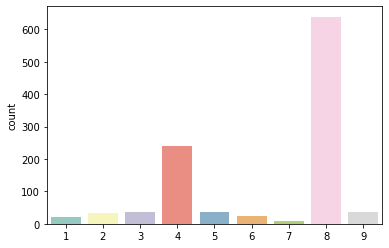

In [43]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [44]:
file_name = 'xgb_all_data_first'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

### Use only bands and indices mean: score 0.61

In [51]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12',
           'ndvi', 'reip', 'datt3', 'gemi', 'msbi', 'ccci', 'avi', 'cvi', 'ndsi', 'siwsi', 'savi', 'evi', 'ndre']

mean_columns = []
for date in dates:
    for layer in features:
        mean_columns.append(layer + '_mean'+date)
print(len(mean_columns))

X_train = train[mean_columns]
X_test = test[mean_columns]
y_train = train['Crop_Id_Ne']

253


Counter({8: 452, 4: 257, 7: 134, 5: 116, 1: 48, 6: 38, 3: 27, 9: 2})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.008506,0.000842,0.007064,0.004463,0.005394,0.018700,0.004059,0.896074,0.054898
1,6,0.003278,0.000445,0.002911,0.003778,0.001549,0.018135,0.003774,0.946801,0.019328
2,10,0.003058,0.000234,0.004981,0.001913,0.000671,0.002191,0.002729,0.957294,0.026929
3,18,0.003568,0.000461,0.004316,0.005858,0.001582,0.005737,0.003432,0.941766,0.033280
4,23,0.000396,0.000401,0.004352,0.001895,0.000879,0.009003,0.003441,0.965196,0.014438
5,28,0.005656,0.001001,0.578544,0.046854,0.005156,0.010839,0.283227,0.064225,0.004500
6,32,0.001229,0.000256,0.001255,0.003177,0.000761,0.002455,0.001911,0.950323,0.038634
7,35,0.013308,0.000491,0.009815,0.005028,0.002280,0.007911,0.006377,0.909019,0.045769
8,43,0.003649,0.010472,0.035018,0.028121,0.008838,0.042508,0.674797,0.186173,0.010424
9,44,0.001278,0.002242,0.011423,0.025424,0.019686,0.031631,0.896189,0.008828,0.003299


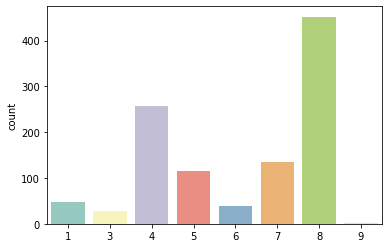

In [52]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [53]:
file_name = 'xgb_bands_only_mean'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

### Use the bands mean/ std, max, min only: 0.58

In [55]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12',
           'ndvi', 'reip', 'datt3', 'gemi', 'msbi', 'ccci', 'avi', 'cvi', 'ndsi', 'siwsi', 'savi', 'evi', 'ndre']

reduced_columns = []
for date in dates:
    for layer in features:
        reduced_columns = reduced_columns + [layer + '_mean'+date, layer + '_sd'+date, layer + '_min'+date, layer + '_max'+date]
print(len(reduced_columns))

X_train = train[reduced_columns]
X_test = test[reduced_columns]
y_train = train['Crop_Id_Ne']

1012


Counter({8: 466, 4: 254, 7: 123, 5: 117, 1: 48, 6: 43, 3: 22, 9: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.002609,0.000376,0.006207,0.003737,0.003498,0.006664,0.002252,0.962056,0.012601
1,6,0.002148,0.000406,0.002441,0.004087,0.001498,0.013763,0.002802,0.947461,0.025392
2,10,0.003172,0.000515,0.009131,0.010512,0.001440,0.008885,0.003051,0.892029,0.071264
3,18,0.002063,0.000281,0.002231,0.004006,0.000941,0.005713,0.003694,0.968940,0.012131
4,23,0.000716,0.000716,0.001052,0.001751,0.000604,0.003393,0.002357,0.968391,0.021020
5,28,0.004325,0.001210,0.671001,0.033206,0.006957,0.015046,0.167332,0.091034,0.009889
6,32,0.001034,0.000218,0.000666,0.001761,0.000849,0.002763,0.002632,0.958651,0.031428
7,35,0.002665,0.000370,0.004531,0.005296,0.001922,0.006417,0.004114,0.954671,0.020014
8,43,0.003290,0.012448,0.071723,0.033775,0.007214,0.108482,0.507842,0.240411,0.014815
9,44,0.000587,0.001606,0.006817,0.008680,0.007979,0.020264,0.944483,0.005285,0.004298


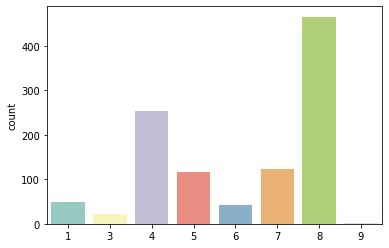

In [56]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [57]:
file_name = 'xgb_bands_only_mean_sd_min_max'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

## Use the bands mean only

In [ ]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12',
           'ndvi', 'reip', 'datt3', 'gemi', 'msbi', 'ccci', 'avi', 'cvi', 'ndsi', 'siwsi', 'savi', 'evi', 'ndre']

mean_columns = []
for date in dates:
    for layer in features:
        mean_columns.append(layer + '_mean'+date)
print(len(mean_columns))

X_train = train[mean_columns]
X_test = test[mean_columns]
y_train = train['Crop_Id_Ne']

Already tried 

In [ ]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

## Use the distances only: 2.03

In [60]:
columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6',
       'crop_id_7', 'crop_id_8', 'crop_id_9', 'occ_neigh_1',
       'occ_neigh_2', 'occ_neigh_3', 'occ_neigh_4', 'occ_neigh_5',
       'occ_neigh_6', 'occ_neigh_7', 'occ_neigh_8', 'occ_neigh_9'
          ]

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

Counter({8: 544, 4: 346, 3: 50, 9: 48, 2: 33, 6: 28, 1: 24, 7: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.099363,0.081810,0.095084,0.109372,0.103385,0.126322,0.103727,0.144963,0.135974
1,6,0.100683,0.082897,0.096348,0.120764,0.104759,0.115482,0.107686,0.146890,0.124490
2,10,0.105680,0.087011,0.101130,0.116326,0.109958,0.106283,0.110322,0.163601,0.099690
3,18,0.104119,0.085725,0.099636,0.114607,0.108333,0.104713,0.108692,0.161184,0.112991
4,23,0.099021,0.081528,0.120329,0.108996,0.103029,0.103758,0.103370,0.144464,0.135506
5,28,0.100477,0.082727,0.122098,0.120516,0.110650,0.121126,0.107465,0.110707,0.124235
6,32,0.100707,0.082916,0.096371,0.110852,0.104784,0.105525,0.105130,0.155903,0.137814
7,35,0.099649,0.082046,0.102255,0.109688,0.103683,0.100218,0.104026,0.154266,0.144169
8,43,0.101657,0.083699,0.104316,0.121932,0.111950,0.116599,0.108727,0.112007,0.139114
9,44,0.101524,0.083589,0.108250,0.140903,0.105634,0.122389,0.105983,0.111861,0.119865


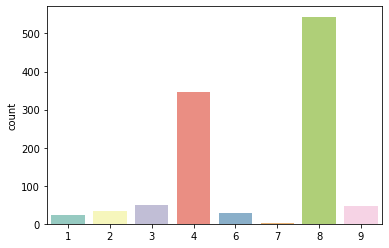

In [61]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [62]:
file_name = 'xgb_distances_columns'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

## Use only the bands without indices all values and stats: 0.66

In [63]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12']

columns = []
for date in dates:
    for layer in features:
        columns = columns + [layer + '_mean'+date, layer + '_sd'+date, layer + '_min'+date, layer + '_max'+date,
               layer + '_val1'+date, layer + '_val2'+date, layer + '_val3'+date, layer + '_val4'+date, layer + '_val5'+date, layer + '_val6'+date,
               layer + '_val7'+date, layer + '_val8'+date, layer + '_val9'+date, layer + '_val10'+date,
               layer + '_val11'+date, layer + '_val12'+date, layer + '_val13'+date, layer + '_val14'+date, layer + '_val15'+date, layer + '_val16'+date,
               layer + '_val17'+date, layer + '_val18'+date, layer + '_val19'+date, layer + '_val20'+date]
        
print(len(columns))

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

2640


Counter({8: 458, 4: 255, 7: 136, 5: 114, 6: 47, 1: 43, 3: 19, 2: 1, 9: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.024039,0.000520,0.009893,0.003707,0.008840,0.012466,0.002807,0.887207,0.050522
1,6,0.004764,0.000611,0.001797,0.004032,0.030188,0.018046,0.005145,0.847639,0.087778
2,10,0.006304,0.000589,0.010571,0.012849,0.006515,0.013455,0.004898,0.924004,0.020816
3,18,0.008899,0.000671,0.004354,0.005758,0.004770,0.004472,0.010471,0.923475,0.037130
4,23,0.001077,0.000869,0.000880,0.001259,0.003007,0.003289,0.001748,0.934063,0.053808
5,28,0.015809,0.001400,0.124539,0.032412,0.032319,0.012697,0.708359,0.068016,0.004447
6,32,0.001944,0.000268,0.000623,0.001448,0.003509,0.005001,0.001358,0.908505,0.077343
7,35,0.003156,0.000472,0.007703,0.004573,0.006123,0.006698,0.004779,0.915194,0.051301
8,43,0.004577,0.004888,0.042968,0.122805,0.007957,0.038909,0.626557,0.134817,0.016522
9,44,0.002079,0.001825,0.014700,0.024970,0.004111,0.093960,0.841996,0.011948,0.004411


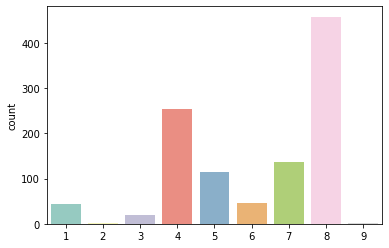

In [64]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [65]:
file_name = 'xgb_bands_withou_indices_without_'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

### Use only ndvi: 0.86

In [70]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['ndvi']

columns = []
for date in dates:
    for layer in features:
        columns = columns + [layer + '_mean'+date, layer + '_sd'+date, layer + '_min'+date, layer + '_max'+date,
               layer + '_val1'+date, layer + '_val2'+date, layer + '_val3'+date, layer + '_val4'+date, layer + '_val5'+date, layer + '_val6'+date,
               layer + '_val7'+date, layer + '_val8'+date, layer + '_val9'+date, layer + '_val10'+date,
               layer + '_val11'+date, layer + '_val12'+date, layer + '_val13'+date, layer + '_val14'+date, layer + '_val15'+date, layer + '_val16'+date,
               layer + '_val17'+date, layer + '_val18'+date, layer + '_val19'+date, layer + '_val20'+date]
        
print(len(columns))

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

264


Counter({8: 489, 4: 243, 7: 134, 5: 117, 1: 43, 6: 39, 3: 9})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.006902,0.000598,0.008773,0.023830,0.004115,0.012495,0.003972,0.912284,0.027031
1,6,0.013903,0.001378,0.028814,0.029081,0.010002,0.042409,0.028854,0.800585,0.044973
2,10,0.007095,0.000967,0.011203,0.096609,0.005257,0.017640,0.026005,0.754173,0.081051
3,18,0.003285,0.000446,0.004229,0.007892,0.007001,0.010613,0.019116,0.926746,0.020674
4,23,0.008741,0.000544,0.021086,0.008610,0.006184,0.007317,0.019760,0.911895,0.015863
5,28,0.101862,0.001244,0.517917,0.032794,0.032591,0.046936,0.096494,0.166726,0.003436
6,32,0.007014,0.000428,0.003301,0.004609,0.003018,0.010728,0.002949,0.916079,0.051874
7,35,0.007560,0.000547,0.005161,0.011197,0.010162,0.009657,0.015355,0.880784,0.059577
8,43,0.015267,0.002547,0.108388,0.159299,0.095285,0.189043,0.366136,0.051528,0.012506
9,44,0.001226,0.000836,0.008853,0.036517,0.012579,0.026912,0.909064,0.003221,0.000791


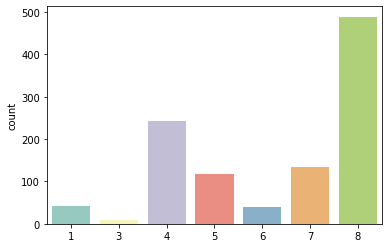

In [71]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [72]:
file_name = 'xgb_only_ndvi'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

## Use bands and ndvi mean, sd, min, max: 0.63

In [73]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12', 'ndvi']

columns = []
for date in dates:
    for layer in features:
        columns = columns + [layer + '_mean'+date, layer + '_sd'+date, layer + '_min'+date, layer + '_max'+date]
        
print(len(columns))

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

484


Counter({8: 460, 4: 253, 7: 135, 5: 115, 1: 46, 6: 41, 3: 21, 2: 2, 9: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.002381,0.000384,0.007955,0.004019,0.004309,0.008816,0.001740,0.955067,0.015330
1,6,0.007472,0.000748,0.003942,0.004711,0.027628,0.009225,0.005016,0.834559,0.106700
2,10,0.013708,0.001146,0.027539,0.052129,0.013061,0.022142,0.007617,0.843876,0.018783
3,18,0.005424,0.000599,0.009044,0.010518,0.004475,0.004692,0.005527,0.910164,0.049557
4,23,0.002563,0.001143,0.002427,0.002063,0.005818,0.004246,0.003605,0.904060,0.074074
5,28,0.018899,0.001220,0.385560,0.025222,0.105393,0.013508,0.380125,0.062543,0.007531
6,32,0.001504,0.000384,0.001250,0.004123,0.002734,0.003651,0.003620,0.876384,0.106349
7,35,0.013372,0.000641,0.010468,0.018579,0.008916,0.012203,0.005463,0.881497,0.048862
8,43,0.003761,0.005208,0.102562,0.078276,0.013096,0.071265,0.460564,0.249053,0.016215
9,44,0.001271,0.000938,0.016603,0.010345,0.004773,0.076513,0.871562,0.014862,0.003133


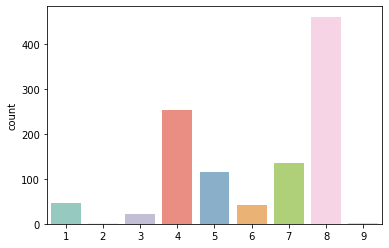

In [74]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [75]:
file_name = 'xgb_only_bands_ndvi_mean_sd_max_min'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

## Use the nearest distances only: 2.06 worse than base model

In [77]:
columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6','crop_id_7', 'crop_id_8', 'crop_id_9'
#            , 'occ_neigh_1',
#        'occ_neigh_2', 'occ_neigh_3', 'occ_neigh_4', 'occ_neigh_5',
#        'occ_neigh_6', 'occ_neigh_7', 'occ_neigh_8', 'occ_neigh_9'
          ]

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

Counter({8: 612, 4: 279, 3: 68, 9: 60, 2: 43, 1: 10, 6: 1, 7: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.099080,0.081368,0.094719,0.128646,0.102533,0.126148,0.103460,0.128613,0.135432
1,6,0.100758,0.082747,0.096324,0.137065,0.104270,0.115738,0.107867,0.130791,0.124441
2,10,0.107230,0.088061,0.102510,0.121271,0.110967,0.108000,0.111970,0.148957,0.101036
3,18,0.107072,0.087931,0.102359,0.115073,0.110803,0.107841,0.111805,0.141052,0.116063
4,23,0.101522,0.083374,0.123246,0.109109,0.105060,0.106535,0.106010,0.126373,0.138771
5,28,0.098039,0.080513,0.119017,0.126736,0.108601,0.118361,0.104956,0.122697,0.121082
6,32,0.103470,0.084973,0.098916,0.111202,0.107076,0.108579,0.108044,0.136307,0.141433
7,35,0.102356,0.084059,0.104928,0.110005,0.105923,0.103091,0.106881,0.134840,0.147916
8,43,0.099229,0.081490,0.101722,0.128275,0.109919,0.113981,0.106230,0.123518,0.135636
9,44,0.104275,0.085635,0.111073,0.112068,0.107909,0.125890,0.108885,0.121291,0.122973


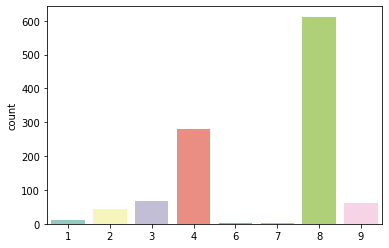

In [78]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [79]:
file_name = 'xgb_only_nearest_distances'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

## Use the neighbors only: 1.33

In [81]:
columns = [
#     'crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6','crop_id_7', 'crop_id_8', 'crop_id_9'
        'occ_neigh_1',
       'occ_neigh_2', 'occ_neigh_3', 'occ_neigh_4', 'occ_neigh_5',
       'occ_neigh_6', 'occ_neigh_7', 'occ_neigh_8', 'occ_neigh_9'
          ]

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

Counter({8: 576, 4: 209, 5: 118, 7: 69, 1: 51, 6: 38, 9: 9, 3: 2, 2: 2})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.009368,0.001700,0.024837,0.120587,0.023699,0.191884,0.042216,0.399987,0.185722
1,6,0.009368,0.001700,0.024837,0.120587,0.023699,0.191884,0.042216,0.399987,0.185722
2,10,0.012880,0.006272,0.007474,0.043368,0.011592,0.016234,0.039596,0.844925,0.017659
3,18,0.012880,0.006272,0.007474,0.043368,0.011592,0.016234,0.039596,0.844925,0.017659
4,23,0.011232,0.004977,0.163626,0.098740,0.214931,0.011672,0.142183,0.340410,0.012229
5,28,0.007643,0.002137,0.046795,0.177958,0.022082,0.174805,0.241967,0.309845,0.016768
6,32,0.006005,0.002209,0.023344,0.038700,0.009637,0.150408,0.047416,0.517759,0.204522
7,35,0.009101,0.002127,0.007002,0.094191,0.010232,0.079530,0.050580,0.670210,0.077027
8,43,0.003041,0.001371,0.039806,0.076144,0.021363,0.211516,0.116376,0.407597,0.122785
9,44,0.007170,0.001091,0.037719,0.264368,0.045023,0.114927,0.202051,0.297474,0.030178


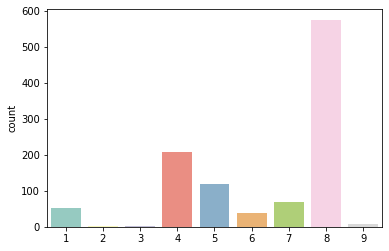

In [82]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [83]:
file_name = 'xgb_only_neighbors_columns'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

## Use only the rgb, nir, ndvi , mean, sd, min and max columns: 0.66

In [84]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'nir', 'ndvi']

columns = []
for date in dates:
    for layer in features:
        columns = columns + [layer + '_mean'+date, layer + '_sd'+date, layer + '_min'+date, layer + '_max'+date]
        
print(len(columns))

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

220


Counter({8: 460, 4: 260, 7: 133, 5: 112, 6: 47, 1: 42, 3: 19, 9: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.004348,0.000491,0.011383,0.005303,0.007118,0.013146,0.001900,0.940896,0.015415
1,6,0.008812,0.000519,0.003748,0.005528,0.011956,0.013182,0.004378,0.904164,0.047713
2,10,0.004028,0.000634,0.018221,0.078835,0.006097,0.009888,0.003677,0.867434,0.011187
3,18,0.004025,0.000395,0.003665,0.008159,0.005254,0.002564,0.003111,0.948432,0.024395
4,23,0.002698,0.000775,0.002167,0.002492,0.005050,0.004763,0.003706,0.933082,0.045268
5,28,0.163232,0.001538,0.281723,0.030794,0.083513,0.009311,0.342690,0.082661,0.004539
6,32,0.002658,0.000378,0.001594,0.002469,0.003298,0.001879,0.001396,0.864306,0.122021
7,35,0.011033,0.000542,0.006613,0.023766,0.007845,0.006633,0.004846,0.897095,0.041627
8,43,0.007777,0.004464,0.041640,0.093755,0.021581,0.033749,0.731656,0.058104,0.007275
9,44,0.002083,0.002248,0.008717,0.040859,0.011891,0.080041,0.823949,0.022883,0.007329


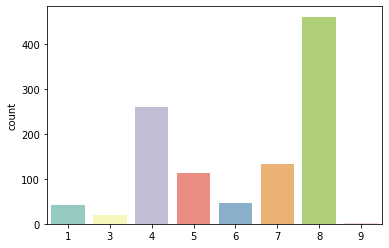

In [85]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [86]:
file_name = 'xgb_rgb_nir_ndvi_columns_mean_sd_max_min'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

### RGB and nir bands : max, min, mean, sd: 0.68

In [87]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'nir']

columns = []
for date in dates:
    for layer in features:
        columns = columns + [layer + '_mean'+date, layer + '_sd'+date, layer + '_min'+date, layer + '_max'+date]
        
print(len(columns))

X_train = train[columns]
X_test = test[columns]
y_train = train['Crop_Id_Ne']

176


Counter({8: 460, 4: 266, 7: 125, 5: 116, 6: 50, 1: 39, 3: 17, 9: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.009418,0.000586,0.018341,0.008199,0.009964,0.008688,0.002393,0.925841,0.016570
1,6,0.018323,0.000558,0.003275,0.006150,0.009903,0.004695,0.005400,0.877421,0.074274
2,10,0.010739,0.000846,0.026070,0.029050,0.008329,0.012195,0.005201,0.893638,0.013932
3,18,0.012512,0.000374,0.004661,0.006722,0.005180,0.003180,0.002497,0.929855,0.035017
4,23,0.003838,0.000781,0.001626,0.003117,0.005985,0.004526,0.002681,0.929142,0.048303
5,28,0.037302,0.001712,0.264154,0.034929,0.221749,0.010447,0.316271,0.103252,0.010183
6,32,0.004786,0.000337,0.001695,0.002304,0.011302,0.001692,0.001742,0.887454,0.088688
7,35,0.014459,0.000571,0.009046,0.025770,0.011582,0.006361,0.005752,0.896989,0.029470
8,43,0.028709,0.014410,0.066081,0.096799,0.029565,0.122327,0.574148,0.043695,0.024267
9,44,0.003919,0.007987,0.018045,0.036213,0.013152,0.197351,0.700176,0.015900,0.007257


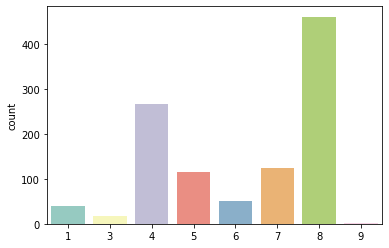

In [88]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [89]:
file_name = 'xgb_rgb_nir_columns_mean_sd_max_min'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)